In [1]:
from palCont import ODECont
import bwhModel
from copy import copy
import numpy as np
import numdifftools as nd
%matplotlib notebook
import matplotlib.pylab as plt

In [2]:
m = bwhModel.main()

dbdt =  b*lamb_max*w*(-b + 1.0)*(b*eta + 1.0)**2 - b
dwdt =  alpha*h*(b + f*q)/(b + q) - b*gamma*w*(b*eta + 1.0)**2 - nuw*w/(b*rhow + 1.0)
dhdt =  -alpha*h*(b + f*q)/(b + q) - nuh*w/(b*rhoh + 1.0) + p*(a*cos(6.28318530717959*omegaf*t/conv_T_to_t) + 1.0)
Local Jacobian: Matrix([[2*b*eta*lamb_max*w*(-b + 1.0)*(b*eta + 1.0) - b*lamb_max*w*(b*eta + 1.0)**2 + lamb_max*w*(-b + 1.0)*(b*eta + 1.0)**2 - 1, b*lamb_max*(-b + 1.0)*(b*eta + 1.0)**2, 0], [alpha*h/(b + q) - alpha*h*(b + f*q)/(b + q)**2 - 2*b*eta*gamma*w*(b*eta + 1.0) - gamma*w*(b*eta + 1.0)**2 + nuw*rhow*w/(b*rhow + 1.0)**2, -b*gamma*(b*eta + 1.0)**2 - nuw/(b*rhow + 1.0), alpha*(b + f*q)/(b + q)], [-alpha*h/(b + q) + alpha*h*(b + f*q)/(b + q)**2 + nuh*rhoh*w/(b*rhoh + 1.0)**2, -nuh/(b*rhoh + 1.0), -alpha*(b + f*q)/(b + q)]])
Linear analysis Jacobian:  Matrix([[2*b*eta*lamb_max*w*(-b + 1.0)*(b*eta + 1.0) - b*lamb_max*w*(b*eta + 1.0)**2 - k**2 + lamb_max*w*(-b + 1.0)*(b*eta + 1.0)**2 - 1, b*lamb_max*(-b + 1.0)*(b*eta + 1.0)**2, 0], [al

a=0.0
p=0.9


<IPython.core.display.Javascript object>


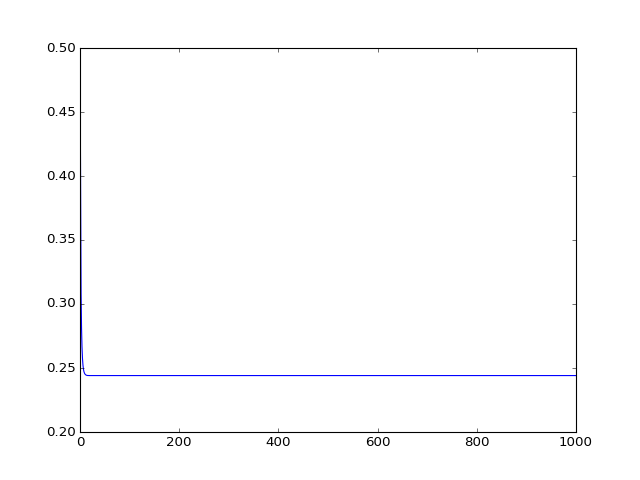

In [3]:
t,sol = m.ode_integrate([0.3,0.4,0.5],p=0.9,a=0.0)
plt.plot(t,sol[0])

<IPython.core.display.Javascript object>


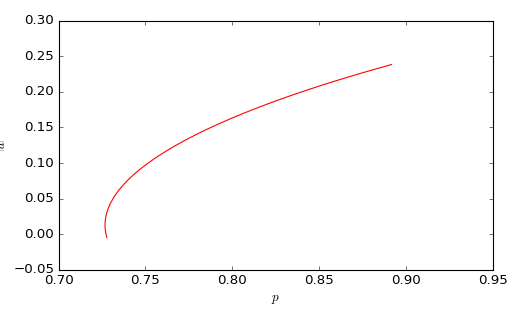

In [4]:
# Perform continuation for defined number of steps
steps = 100
import matplotlib.animation as animation
fig = plt.figure(figsize=(4*1.618,4))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
plt.xlabel(r'$p$')
plt.ylabel(r'$\left| u \right|$')
plt.tight_layout()
fig.canvas.draw()
ims = []
h = []
u = []
cont = ODECont(m,"p",sol.T[-1],m.p['p'],-0.01)
for i in range(steps):
    cont.pt_type=""
    cont.step()
    h.append(cont.h_n)
    u.append(cont.u_n[0])
    #plt.xlabel(r'$p$')
    #plt.ylabel(r'$\left| u \right|$')
    #plt.tight_layout()
    im1=ax.scatter(cont.h_n,cont.u_n[0])
    im2,=ax.plot(h,u,'r')
    ims.append([im2])
    fig.canvas.draw()
    im1.remove()
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,repeat_delay=1000)
ani.save('continuation.mp4')